In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
import os
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/MyDrive/Potato classifier/training/PlantVillage')
!ls

test  train  val


In [ ]:
IMAGE_SIZE = 256
CHANNELS = 3

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Potato classifier/training/PlantVillage/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [ ]:

train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Potato classifier/training/PlantVillage/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 430 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Potato classifier/training/PlantVillage/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 403s 8s/step - loss: 0.8966 - accuracy: 0.4959 - val_loss: 0.7952 - val_accuracy: 0.6146
Epoch 2/20
47/47 [==============================] - 54s 1s/step - loss: 0.6242 - accuracy: 0.7028 - val_loss: 0.5574 - val_accuracy: 0.7552
Epoch 3/20
47/47 [==============================] - 41s 878ms/step - loss: 0.5588 - accuracy: 0.7354 - val_loss: 0.5138 - val_accuracy: 0.7604
Epoch 4/20
47/47 [==============================] - 36s 779ms/step - loss: 0.5661 - accuracy: 0.7381 - val_loss: 0.6170 - val_accuracy: 0.7031
Epoch 5/20
47/47 [==============================] - 32s 679ms/step - loss: 0.4236 - accuracy: 0.8114 - val_loss: 0.4322 - val_accuracy: 0.8333
Epoch 6/20
47/47 [==============================] - 32s 675ms/step - loss: 0.3336 - accuracy: 0.8670 - val_loss: 0.3887 - val_accuracy: 0.8542
Epoch 7/20
47/47 [==============================] - 31s 660ms/step - loss: 0.3586 - accuracy: 0.8596 - val_loss: 0.3136 - val_accuracy: 0.8490
Epoc

In [ ]:
model.evaluate(test_generator)

7/7 [==============================] - 41s 7s/step - loss: 0.1040 - accuracy: 0.9630


[0.1039859727025032, 0.9629629850387573]

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

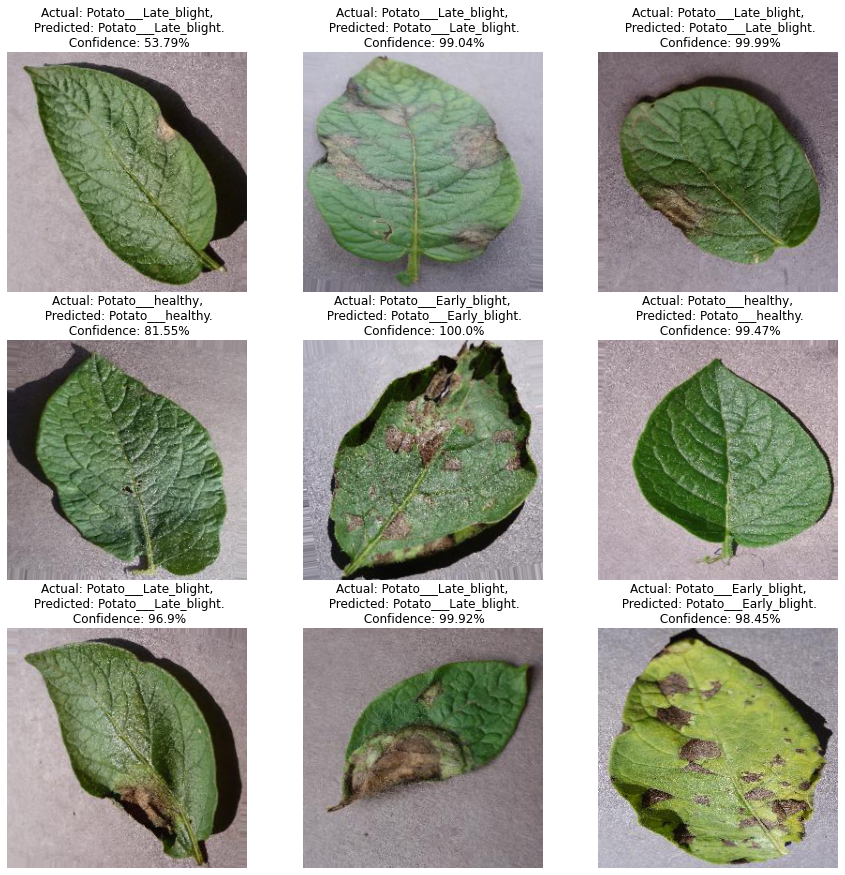

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [ ]:
    from PIL import Image

    image = np.array(
        Image.open("/content/gdrive/MyDrive/Potato classifier/training/PlantVillage/test/Potato___Late_blight/67001c81-d182-4bc6-b9b8-f25ddb0a2db4___RS_LB 5231.JPG").convert("RGB").resize((256, 256)) # image resizing
    )

    image = image/255 # normalize the image in 0 to 1 range

    img_array = tf.expand_dims(image, 0)
    predictions = model.predict(img_array)

    print("Predictions:",predictions)

    predicted_class = class_names[np.argmax(predictions[0])]
   
    print(predicted_class)

Predictions: [[3.3470499e-06 9.9995244e-01 4.4263612e-05]]
Potato___Late_blight


In [ ]:
model.save("pot_final.h5")